# Titanic Assignment


In [155]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1. Loading the dataset

In [157]:
### Ques 1 -- Read the Titanic dataset and import all required libraries.
pd.set_option('float_format', '{:f}'.format)
df = pd.read_csv(r'F:\Skillovilla Python\ML\titanic.csv')
df.head()

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.000000,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.000000,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.000000,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.000000,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.920000,male,1,0


In [158]:
df.rename(columns = {'Unnamed: 0':'Serial_No'}, inplace = True)
df.head()

,Serial_No,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.000000,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.000000,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.000000,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.000000,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.920000,male,1,0


In [159]:
df.columns

Index(['Serial_No', 'Name', 'PClass', 'Age', 'Sex', 'Survived', 'SexCode'], dtype='object')

In [160]:
df.shape

(1313, 7)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Serial_No  1313 non-null   int64  
 1   Name       1313 non-null   object 
 2   PClass     1313 non-null   object 
 3   Age        756 non-null    float64
 4   Sex        1313 non-null   object 
 5   Survived   1313 non-null   int64  
 6   SexCode    1313 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 71.9+ KB


In [162]:
df.describe()

,Serial_No,Age,Survived,SexCode
count,1313.000000,756.000000,1313.000000,1313.000000
mean,657.000000,30.397989,0.342727,0.351866
std,379.174762,14.259049,0.474802,0.477734
min,1.000000,0.170000,0.000000,0.000000
25%,329.000000,21.000000,0.000000,0.000000
50%,657.000000,28.000000,0.000000,0.000000
75%,985.000000,39.000000,1.000000,1.000000
max,1313.000000,71.000000,1.000000,1.000000


In [163]:
df.isnull().sum()

Serial_No      0
Name           0
PClass         0
Age          557
Sex            0
Survived       0
SexCode        0
dtype: int64

## 2. Data Cleaning

In [164]:
null_columns = [features for features in df.columns if df[features].isnull().sum()>0]

In [165]:
null_columns

['Age']

Since Age is a parameter that cannot be compromised with the basic parameters. Also, lets check the rest of the parameters if they are clear.

In [166]:
df['PClass'].value_counts()

3rd    711
1st    322
2nd    279
*        1
Name: PClass, dtype: int64

In [167]:
mode1 = df['PClass'].mode()
mode1

0    3rd
dtype: object

In [168]:
df['PClass'] = df['PClass'].map({'1st':1,'2nd':2,'3rd':3,'*':3})
df.head()

,Serial_No,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1,29.000000,female,1,1
1,2,"Allison, Miss Helen Loraine",1,2.000000,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1,30.000000,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1,25.000000,female,0,1
4,5,"Allison, Master Hudson Trevor",1,0.920000,male,1,0


In [169]:
df['PClass'].isnull().sum()

0

We can drop the 'Sex' column as 'SexCode' column is given as female-->1 and male-->0

In [170]:
df.drop('Sex',axis=1,inplace=True)
df.head()                       

,Serial_No,Name,PClass,Age,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1,29.000000,1,1
1,2,"Allison, Miss Helen Loraine",1,2.000000,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1,30.000000,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1,25.000000,0,1
4,5,"Allison, Master Hudson Trevor",1,0.920000,1,0


In [171]:
df['Survived'].value_counts()

0    863
1    450
Name: Survived, dtype: int64

In [172]:
df['SexCode'].value_counts()

0    851
1    462
Name: SexCode, dtype: int64

Now, we need to look for a strategy to replace null values for 'Age' column. A simple Imputer using Linear Regression is used.

In [173]:
 df1 = df.drop('Name',axis=1)

In [174]:
df1['Age'].isnull().sum()

557

In [176]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [177]:
testdf = df1[df1['Age'].isnull()==True]
traindf = df1[df1['Age'].isnull()==False]

In [178]:
y = traindf['Age']
traindf.drop(['Age'],axis=1,inplace=True)
lr.fit(traindf,y)

LinearRegression()

In [179]:
testdf.drop("Age",axis=1,inplace=True)
#testdf = testdf.reshape(-1, 1)
pred = lr.predict(testdf)

In [181]:
testdf['Age']= [round(num) for num in pred]
traindf['Age']=[round(num) for num in y]

In [183]:
df1 = pd.concat([traindf,testdf])

In [185]:
df1.head(10)

,Serial_No,PClass,Survived,SexCode,Age
0,1,1,1,1,29
1,2,1,0,1,2
2,3,1,0,0,30
3,4,1,0,1,25
4,5,1,1,0,1
5,6,1,1,0,47
6,7,1,1,1,63
7,8,1,0,0,39
8,9,1,1,1,58
9,10,1,0,0,71


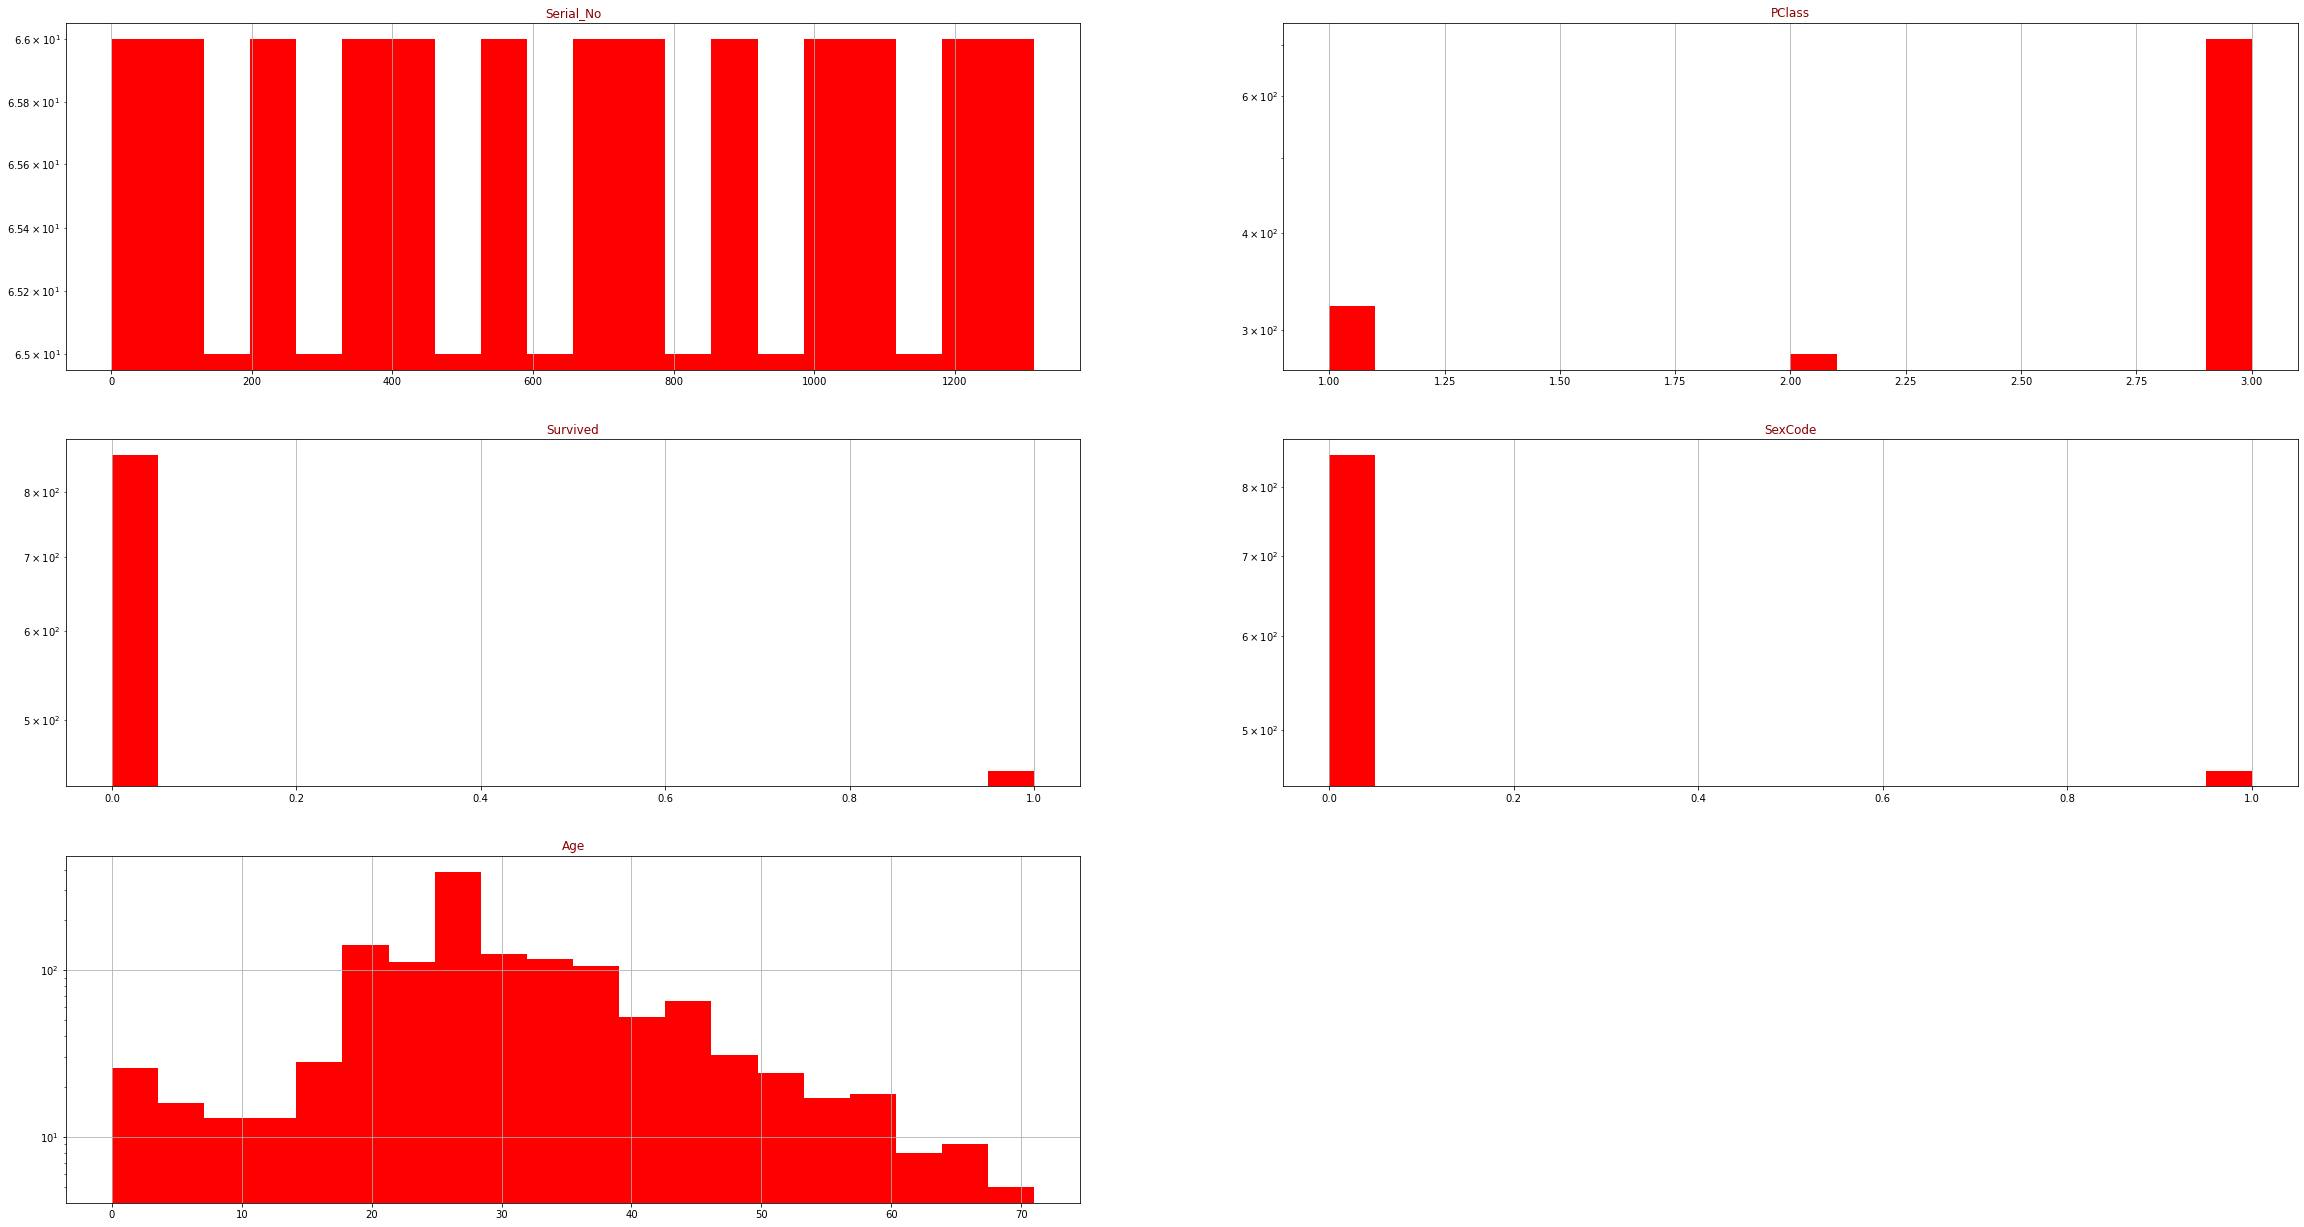

In [214]:
def histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(40,60))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,color='r')
        ax.set_title(feature,color='DarkRed')
        ax.set_yscale('log')
    plt.show()
    
histograms(df,df.columns,8,2)

In [ ]:
### Ques 2 -- Find out in the target column (survival) what is the respective count of values

<AxesSubplot:xlabel='Survived', ylabel='count'>

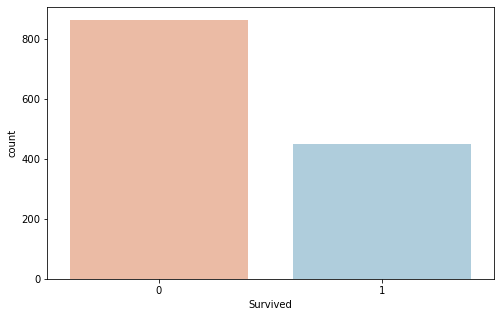

In [186]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(df['Survived'], palette='RdBu')   # count number of obvs in each class

In [187]:
Survived_Count,Not_Survived_Count = df['Survived'].value_counts()

In [188]:
print('Number of people Survived: ', Survived_Count)
print('Number of people could not Survive: ', Not_Survived_Count)

Number of people Survived:  863
Number of people could not Survive:  450


In [189]:
print('')
print('% of of people Survived', round(Survived_Count / len(df) * 100, 2), '%')
print('% of people could not Survive', round(Not_Survived_Count / len(df) * 100, 2), '%')


% of of people Survived 65.73 %
% of people could not Survive 34.27 %


In [ ]:
### Ques 3 -- Confirm through a chart that Women more likely survived than Men

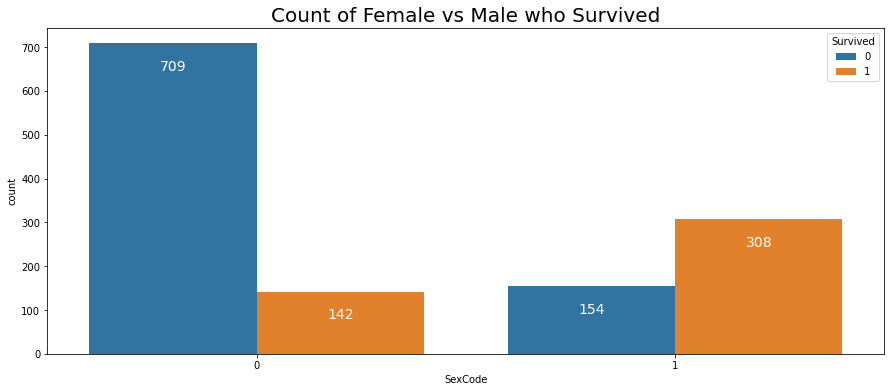

In [192]:
fig = plt.figure(figsize=(15,6))
ax = sns.countplot('SexCode',hue='Survived',data=df)
ax.set_title('Count of Female vs Male who Survived', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
plt.show()


In [194]:
Female_Survived,Female_Not_Survived,Male_Not_Survived,Male_Survived = df.groupby(['SexCode'])['Survived'].value_counts()

In [195]:
print('Number of Female Survived: ', Female_Survived)
print('Number of Female could not Survive: ', Female_Not_Survived)

Number of Female Survived:  709
Number of Female could not Survive:  142


In [196]:
print('Number of Male Survived: ', Male_Survived)
print('Number of Male could not Survive: ', Male_Not_Survived)

Number of Male Survived:  154
Number of Male could not Survive:  308


In [197]:
print('')
print('% of  Female people Survived', round((Female_Survived / (Female_Survived+Female_Not_Survived)) * 100, 2), '%')
print('% of  Male people Survived', round((Male_Survived / (Male_Survived+Male_Not_Survived)) * 100, 2), '%')



% of  Female people Survived 83.31 %
% of  Male people Survived 33.33 %


In [198]:
data = [Female_Survived,Female_Not_Survived,Male_Not_Survived,Male_Survived]
labels = ['Female_Survived','Female_Not_Survived','Male_Not_Survived','Male_Survived']
colors = sns.color_palette('pastel')[0:5]

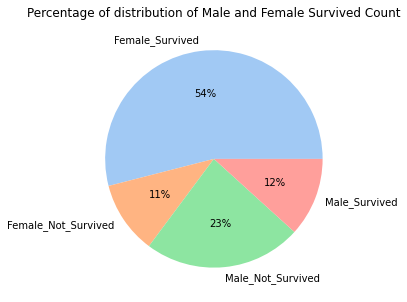

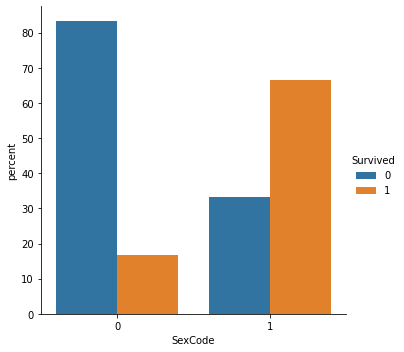

In [201]:
#create pie chart
plt.pie(data,labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of distribution of Male and Female Survived Count')
plt.show()
p,q = 'SexCode', 'Survived'
df.groupby(p)[q].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=p,y='percent',hue=q,kind='bar')
plt.show()

In [ ]:
### Ques 4 -- Confirm through a chart that a person aboarded with more than 2 siblings or spouse more likely survive

```python
df['First_Name'] = df['Name'].str.split(',').str[0]
df['Honoforic'] = df['Name'].str.split(',').str[1].str.split(' ').str[1]
df['Middle_Name'] = df['Name'].str.split(',').str[1].str.split(' ').str[2]
df['Last_Name'] = df['Name'].str.split(',').str[1].str.split(' ').str[3]

df2 = df.groupby(['First_Name','Middle_Name'])['Survived'].count()
df = df.merge(df2, on=['First_Name','Middle_Name'], how='left')

df.rename(columns = {'Survived_y':'Family_Count','Survived_x':'Survived'}, inplace = True)
df['Family_Count'].fillna(1, inplace=True)
a,b = df[df['Family_Count']>=2]['Survived'].value_counts()
c,d = df[df['Family_Count']<2]['Survived'].value_counts()

e = (b/(a+b))*100
f = (d/(c+d))*100
print('% that a person aboarded with more than 2 siblings or spouse survived is', e)
print('% that a person aboarded with less than 2 siblings or spouse survived is', f)

data = [e,f]
labels = ['Large Family Survival Rate','Small Family Survival Rate']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data,labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Percentage of distribution of Family Survival Rate with more than 2 siblings or a spouse')
plt.show()
df.head()
```

```python
df.drop(['Name','Sex','First_Name','Honoforic','Middle_Name','Last_Name'],axis=1,inplace=True)
df.drop(df[df['PClass']=='*'].index, inplace = True)
for i,x in enumerate(df['PClass']):
    if str(x)=='nan':
        df.drop([df.index[i]],inplace=True)
```

## 3.Model building and Evaluation

In [ ]:
### Ques 6 -- Perform predictions on the Test dataset

In [202]:
X = df1.drop('Survived',axis=1)
y = df1['Survived']

In [203]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [204]:
from sklearn.preprocessing import StandardScaler #importing standaard scalar to make the mean 0 and sd = 1
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #initial set of available data helping program to understand how to apply technology
X_test = sc.fit_transform(X_test)

In [205]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)

In [206]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [215]:
import statsmodels.api as sm

X = sm.add_constant(X)
reg_fit = sm.Logit(y,X)
results = reg_fit.fit()

Optimization terminated successfully.
         Current function value: 0.426237
         Iterations 6


In [216]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1313
Model:                          Logit   Df Residuals:                     1308
Method:                           MLE   Df Model:                            4
Date:                Thu, 28 Jul 2022   Pseudo R-squ.:                  0.3369
Time:                        03:08:42   Log-Likelihood:                -559.65
converged:                       True   LL-Null:                       -844.03
Covariance Type:            nonrobust   LLR p-value:                8.897e-122
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3534      0.458      7.315      0.000       2.455       4.252
Serial_No     -0.0007      0.000     -1.483      0.138      -0.002       0.000
PClass        -1.2261      0.231     -5.299      0.000      -1.680      -0.773
SexCode        2.4671      0.158     15.609      0.000       2.157       2.777
Age           -0.0629      0.008     -8.033      0.000      -0.078      -0.048
==============================================================================
"""

In [217]:
params = np.exp(results.params)
conf = np.exp(results.conf_int())
conf['OR'] = params
pvalue=round(results.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%', 'CI 95%', 'Odds Ratio','pvalue']
conf.head()

,CI 95%,CI 95%,Odds Ratio,pvalue
const,11.645285,70.235789,28.599227,0.000000
Serial_No,0.998307,1.000235,0.999270,0.138000
PClass,0.186441,0.461789,0.293422,0.000000
SexCode,8.647787,16.068632,11.788049,0.000000
Age,0.924790,0.953594,0.939082,0.000000


In [218]:
train_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)
print('Training score: {}, Testing score: {}'.format(train_score,test_score))

Training score: 0.8333333333333334, Testing score: 0.8517110266159695


In [ ]:
### Ques 7 -- Create the confusion matrix

In [207]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

confusion matrix:
 [[165  18]
 [ 21  59]]


In [ ]:
### Ques 8 -- Find the accuracy of your model

In [208]:
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
print('accuracy score = ',lra)

accuracy score =  0.8517110266159695


In [220]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       183
           1       0.77      0.74      0.75        80

    accuracy                           0.85       263
   macro avg       0.83      0.82      0.82       263
weighted avg       0.85      0.85      0.85       263



In [221]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)
cross_val_score(LogisticRegression(),X,y,cv=cv)

array([0.84790875, 0.79467681, 0.80228137, 0.84410646])

In [222]:
y_predicted_probs = lr.predict_proba(X_test)[:,:]
y_predicted_probs_df = pd.DataFrame(data=y_predicted_probs, columns=['Prob of Not Survived (0)','Prob of getting Survived(1)'])
y_predicted_probs_df.head()

,Prob of Not Survived (0),Prob of getting Survived(1)
0,0.915555,0.084445
1,0.876312,0.123688
2,0.284797,0.715203
3,0.964297,0.035703
4,0.600560,0.399440


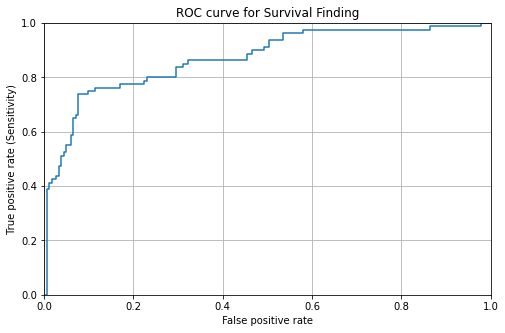

In [223]:
y_predicted_probs_yes=lr.predict_proba(X_test)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probs_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Survival Finding')
plt.xlabel(' False positive rate ')
plt.ylabel(' True positive rate (Sensitivity) ')
plt.grid(True)

In [224]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predicted_probs_yes[:,1])

0.8706967213114754

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

def best_model_using_GridSearchCV(X,y):
    algorithms = {
        'logistic_regression':{
            'model' : LogisticRegression(solver = 'liblinear',multi_class='auto'),
            'params' : {
                'C' : [1,5,10]
            }
        },
        'svm' : {
            'model': svm.SVC(gamma='auto'),
            'params':{
                'C': [1,10,20],
                'kernel':['rbf','linear']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)
    for algorithm_name, configuration in algorithms.items():
        gs = GridSearchCV(configuration['model'],configuration['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algorithm_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model_using_GridSearchCV(X,y)